# Pandas

The pandas module is one of the most powerful tools for data analysis.  Pandas was designed to work with tabular and heterogeneous data.  The original author of pandas is Wes McKinney, so it makes sense that most of his book "Python for Data Analysis" covers the functionality of pandas. In fact, chapters 5 - 11 are basically about what pandas can do.  

Here are some of the things that I hope you can do by the end of the section:
* Create Series and DataFrames (ch 5)
* Index, slice, and filter (ch 5)
* Examine your data (ch 5)
* Compute summarization and descriptive statistics (ch 5)
* Drop rows and columns (ch 5)
* Create columns (ch 5)
* Count the number of missing values (ch 7)
* Drop or fill missing values (ch 7)
* Drop duplicate rows (ch 7)
* Combine categories of categorical data (ch 7)
* Discretize numerical data (ch 7)
* Have some practice with hierarchical indexing (ch 8)
* Reset the index (ch 8)
* Merge and concatenate DataFrames (ch 8)
* Simple plots with pandas (ch 9)
* Use .groupby() for category aggregation (ch 10)
* Fill missing values by group summary statistics (ch 10)

## Importing Pandas

It is standard to use the alias ``pd`` when importing pandas.
~~~
import pandas as pd
~~~
I usually import numpy at the same time since pandas and numpy are often used in tandem.

In [2]:
# Import Pandas library
import pandas as pd
import numpy as np

In [3]:
# Note: you can install pandas within the notebook:
# !pip install pandas
# OR
# !conda install pandas

In [4]:
# Try:  Create a Series from a list
x = [1,2,3,4,5]
lab = ['a','b','c','d','e']

s = pd.Series(x, index=lab)
print(s)

a    1
b    2
c    3
d    4
e    5
dtype: int64


In [5]:
# Creating a Series with a dictionary

d = pd.Series({'a': 1, 'b': 2, 'c': 3})
print(d)

a    1
b    2
c    3
dtype: int64


## DataFrames
DataFrames are the main data structure of pandas and were directly inspired by the R programming language.  DataFrames are a bunch of Series objects put together to share the same (row) index.  A DataFrame has both a row and a column index.  

## Creating DataFrames
DataFrames can also be created from lists, dictionaries, or numpy arrays.
Syntax: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)


In [6]:
x = [[1, 2, 3],
     ['a', 'b', 'c'],
     [4, 5, 6]]

x_df = pd.DataFrame(x, columns = ['p', 'd', 'q'], index = ['x', 'y', 'z'])
print(x_df)

   p  d  q
x  1  2  3
y  a  b  c
z  4  5  6


In [7]:
# Create a simple DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'Salary': [50000, 60000, 75000]}

df = pd.DataFrame(data)

# Display the DataFrame
df

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,75000


In [8]:
# Accessing specific columns
names = df['Name']
ages = df['Age']

# Accessing a specific row
row = df.loc[1]

# Accessing a specific element
salary = df.at[2, 'Salary']


In [ ]:
# Display the results
print("Names: \n", names)


In [ ]:
print("Ages: \n", ages)

In [ ]:
print("Row 1: \n", row)

In [ ]:
print("Charlie's Salary:", salary)

In [ ]:
# Add a new column calculated from existing columns
df['Birth Year'] = 2023 - df['Age']

# Display the DataFrame with the new column
df.head()


In [ ]:
# Sort the DataFrame by Age in descending order
df_sorted = df.sort_values(by='Birth Year', ascending=True)

# Display the sorted DataFrame
df_sorted.head()


## Read in some practice data

pd.read_csv can be used to load in external .csv files  
We can access a summary of the data using df.info()  
We can use df.head() to view the first view entries  

In [12]:
## Iris data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, names=['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class'])

## Looking at your DataFrame

``df.head()``  
``df.tail()``  
``df.shape``  
``df.info()``  
``df.describe()``   
``df.columns``

In [13]:
iris.shape

(150, 5)

In [14]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [15]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
# Rename columns
iris.rename(columns={'class': 'species'}, inplace=True)

# Display the DataFrame with renamed columns
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Basic Plotting
Pandas can be used for basic plotting, but we will cover more later

<Axes: ylabel='Frequency'>

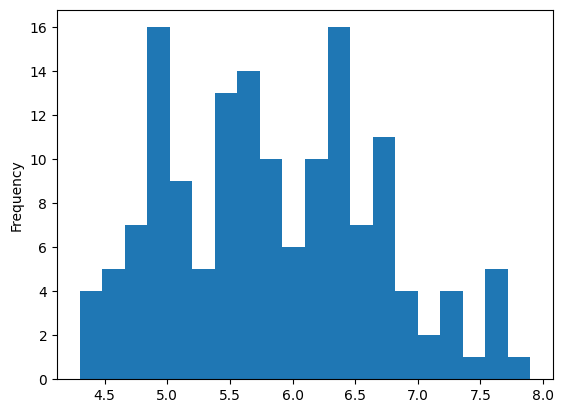

In [19]:
iris['sepal_length'].plot.hist(bins=20)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

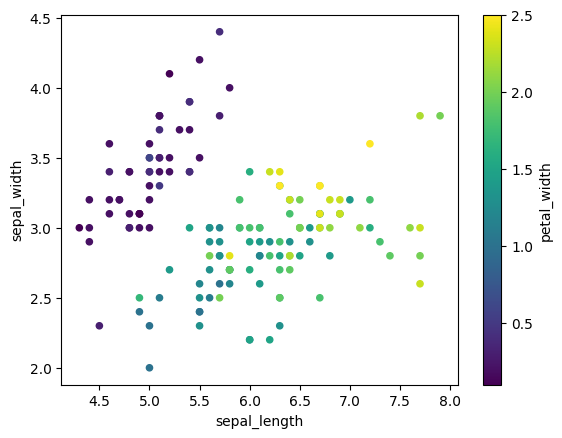

In [20]:
iris.plot.scatter('sepal_length','sepal_width', c='petal_width')

<Axes: >

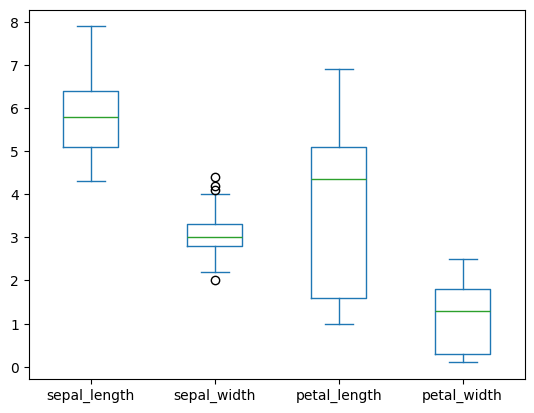

In [21]:
iris.plot.box()

<Axes: ylabel='Density'>

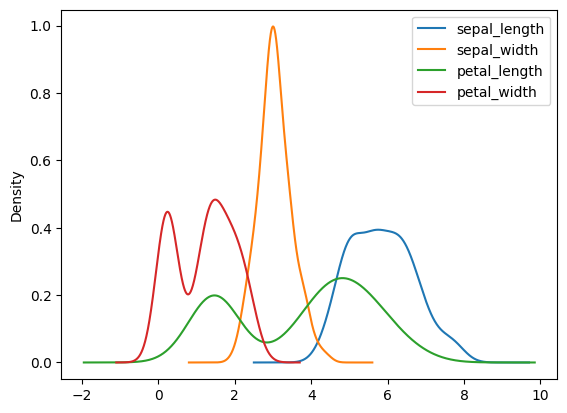

In [22]:
iris.plot.kde()

---

## Selection and Indexing

There are various ways to get subsets of the data.  In the following ``df`` refers to a DataFrame.

#### Selecting columns
One column (producing a Series)
~~~
df['column_name']
df.column_name
~~~
---

Multiple columns (producing a DataFrame)
~~~
df[['column_name']] # this will produce a DataFrame
df[['col1', 'col2', 'col3']]
~~~
---

#### Selecting row and columns with ``loc`` and ``iloc``
~~~
df.loc['row_name', 'col_name']
df.iloc['row index', 'col index']
~~~

``loc`` and ``iloc`` also support slicing.  Note: when slicing with ``loc``, the end point IS including (but not when slicing with ``iloc``.

---
~~~
df.loc['row_name1':'row_name2', 'col_name1':'col_name2']
df.loc[:, 'col_name1':'col_name2']
df.loc['r1':'r2', :]
df.loc[['r1','r2','r3'],['c1','c2]]
~~~
*When using `.loc()`, `row_name2` and `col_name2` WILL be included*

---
~~~
df.iloc[index1:index2, col1:col2]
~~~
*When using `.iloc()`, `index2` and `col2` will NOT be included*

---
#### Selecting rows based on column condition
~~~
df[df[boolean condition]]

df[mask]
~~~


In [23]:
iris.loc[0:5, ['petal_width', 'petal_length']]

,petal_width,petal_length
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4
5,0.4,1.7


In [24]:
iris.iloc[0:2, 0:]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [25]:
iris['sepal_length'] > 6

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149    False
Name: sepal_length, Length: 150, dtype: bool

In [26]:
## Slicing with a boolean series
iris[iris['sepal_length'] > 6]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


In [27]:
# Filter data using multiple conditions (Note the parentheses!)
filtered_iris = iris[(iris['sepal_length'] > 6) & (iris['petal_length'] > 5)]

# Display the filtered data
filtered_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica


In [28]:
# Reset to default 0,1...n index
filtered_iris.reset_index(drop = True).head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.3,3.3,6.0,2.5,Iris-virginica
1,7.1,3.0,5.9,2.1,Iris-virginica
2,6.3,2.9,5.6,1.8,Iris-virginica
3,6.5,3.0,5.8,2.2,Iris-virginica
4,7.6,3.0,6.6,2.1,Iris-virginica


## Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [29]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [30]:
hier_index

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [31]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

A         B
G1 1  0.312783  1.022681
   2  0.574076  0.152996
   3 -1.617780  0.937402
G2 1  0.081093  0.803987
   2  1.064544  0.512554
   3 -0.911206  0.084887

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [32]:
df.loc['G1']

,A,B
1,0.312783,1.022681
2,0.574076,0.152996
3,-1.617780,0.937402


In [33]:
df.loc['G1'].loc[1]

A    0.312783
B    1.022681
Name: 1, dtype: float64

In [34]:
df.index.names

FrozenList([None, None])

In [35]:
df.index.names = ['Group','Num']

In [36]:
df

A         B
Group Num                    
G1    1    0.312783  1.022681
      2    0.574076  0.152996
      3   -1.617780  0.937402
G2    1    0.081093  0.803987
      2    1.064544  0.512554
      3   -0.911206  0.084887

In [37]:
# The xs() method in pandas is used to extract a cross-section from a DataFrame or Series
df.xs('G1')

,A,B
Num,,
1,0.312783,1.022681
2,0.574076,0.152996
3,-1.617780,0.937402


## Methods for computing summary and descriptive statistics
pandas objects have many reduction / summary statistics methods that extract a single value from the rows or columms of a DataFrame.  See Table 5-8 in *Python for Data Analysis* for a more complete list, but here are a few that are commonly used.

`count`: number of non-NA values   
`describe`: summary statistics for numerical columns   
`min`, `max`: min and max values  
`argmin`, `argmax`: index of min and max values (for Series only)   
`idxmin`, `idxmax`: index or column name of min and max values  
`sum`: sum of values  
`cumsum` : cummulative sum
`mean`: mean of values  
`quantile`: quantile from 0 to 1 of values  
`var`: (sample) variance of values  
`std`: (sample) standard deviation of values  
`df.corr()` and `df.cov()` will produce the correlation or covariance matrix.  Or two Series can be used to get the correlation (or covariance) with `Series1`.corr(`Series2`).

Numpy functions can also be used: `np.corrcoef()`

Most of these functions also take an `axis` argument which specifies whether to reduce over rows or columns: 0 for rows and 1 for columns.   
There is also an argument `skipna` which specifies whether or not to skip missing values.  The default is True.


In [38]:
iris.sepal_length.argmin()

np.int64(13)

In [39]:
iris.cumsum()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,10.0,6.5,2.8,0.4,Iris-setosaIris-setosa
2,14.7,9.7,4.1,0.6,Iris-setosaIris-setosaIris-setosa
3,19.3,12.8,5.6,0.8,Iris-setosaIris-setosaIris-setosaIris-setosa
4,24.3,16.4,7.0,1.0,Iris-setosaIris-setosaIris-setosaIris-setosaIr...
...,...,...,...,...,...
145,851.6,446.2,543.1,171.8,Iris-setosaIris-setosaIris-setosaIris-setosaIr...
146,857.9,448.7,548.1,173.7,Iris-setosaIris-setosaIris-setosaIris-setosaIr...
147,864.4,451.7,553.3,175.7,Iris-setosaIris-setosaIris-setosaIris-setosaIr...
148,870.6,455.1,558.7,178.0,Iris-setosaIris-setosaIris-setosaIris-setosaIr...


## Unique values and value counts

``df.nunique()`` or ``df['column'].nunique()``  

``df.value_counts()`` or ``df['column'].value_counts()``

In [40]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [41]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

`df.corr()` and `df.cov()` will produce the correlation or covariance matrix.  Or two Series can be used to get the correlation (or covariance) with `Series1`.corr(`Series2`).

Numpy functions can also be used: `np.corrcoef()`

In [42]:
iris.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


---
## Dropping rows and columns

Columns and rows can be dropped with the `.drop()` method (using `axis=1` for columns and `axis=0` (default) for rows).  This method creates a new object unless `.inplace = True` is specified.

The `del` command can also be used to drop columns in place.

In [43]:
no_species = iris.drop('species', axis = 1)
no_species.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
# The original is unchanged if inplace = False
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Adding columns

Add a new column to the end of a data frame
~~~
df['new_col'] = value
~~~

Add a new column at a specific index

`.insert(col_index, 'new_col_name', value(s))`

In [45]:
iris['sum_petal_dims'] = iris['petal_length'] + iris['petal_width']

In [46]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sum_petal_dims
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6
1,4.9,3.0,1.4,0.2,Iris-setosa,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5
3,4.6,3.1,1.5,0.2,Iris-setosa,1.7
4,5.0,3.6,1.4,0.2,Iris-setosa,1.6


## Using Apply

In [47]:
iris['sepal_length'].apply(np.log)

0      1.629241
1      1.589235
2      1.547563
3      1.526056
4      1.609438
         ...   
145    1.902108
146    1.840550
147    1.871802
148    1.824549
149    1.774952
Name: sepal_length, Length: 150, dtype: float64

In [48]:
# What happened?
iris['sepal_length'].apply(np.mean)

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [49]:
iris.iloc[:, 0:4].apply(np.mean)

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [50]:
iris['species'].apply(lambda x: x.title())

0         Iris-Setosa
1         Iris-Setosa
2         Iris-Setosa
3         Iris-Setosa
4         Iris-Setosa
            ...      
145    Iris-Virginica
146    Iris-Virginica
147    Iris-Virginica
148    Iris-Virginica
149    Iris-Virginica
Name: species, Length: 150, dtype: object

In [51]:
iris['species'].str.lower()

0         iris-setosa
1         iris-setosa
2         iris-setosa
3         iris-setosa
4         iris-setosa
            ...      
145    iris-virginica
146    iris-virginica
147    iris-virginica
148    iris-virginica
149    iris-virginica
Name: species, Length: 150, dtype: object

In [52]:
def zero_one_scale(x):
    return (x - np.min(x)) / (np.max(x)- np.min(x))

In [53]:
## Why does this not work?
iris['sepal_length'].apply(zero_one_scale)

/var/folders/pf/l6k9n55d7rx9sjhjnsmb8m180000gp/T/ipykernel_55255/1522982835.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return (x - np.min(x)) / (np.max(x)- np.min(x))


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
Name: sepal_length, Length: 150, dtype: float64

In [54]:
## Why does this not work?
iris['petal_length'].apply(lambda x: zero_one_scale(x))

/var/folders/pf/l6k9n55d7rx9sjhjnsmb8m180000gp/T/ipykernel_55255/1522982835.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return (x - np.min(x)) / (np.max(x)- np.min(x))


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
Name: petal_length, Length: 150, dtype: float64

In [55]:
zero_one_scale(iris.petal_length)

0      0.067797
1      0.067797
2      0.050847
3      0.084746
4      0.067797
         ...   
145    0.711864
146    0.677966
147    0.711864
148    0.745763
149    0.694915
Name: petal_length, Length: 150, dtype: float64

## Missing Values

**Ways to count missing values**
~~~
df.info()
df.isna().sum()
df.isna().sum(axis=0)
~~~

**Drop missing values with `.dropna()`**

Calling `.dropna()` without any arguments will drop all rows with missing values

Arguments:
* `axis=1` will drop columns with missing values (default is `axis=0`)
* `how='all'` will drop rows (or columns) if all the values are NA (default is `how='any'`)
* `subset=` will limit na search to these specic columns (or indexes)
    

**Fill missing values with `.fillna()`**
Arguments:
* `value`: value used to fill.
* `method'`: methods used to fill (forward or backward fill)


In [56]:
# Creating a DataFrame with missing values
missing_data = {'A': [1, 2, np.nan],
        'B': [np.nan, 4, 6],
        'C': [7, 8, 9]}

m_df = pd.DataFrame(missing_data)
m_df

,A,B,C
0,1.0,NaN,7
1,2.0,4.0,8
2,NaN,6.0,9


In [57]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2 non-null      float64
 1   B       2 non-null      float64
 2   C       3 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 204.0 bytes


In [58]:
# Check for missing values
m_df.isna()

,A,B,C
0,False,True,False
1,False,False,False
2,True,False,False


In [59]:
# Check how many missing values
m_df.isna().sum()

A    1
B    1
C    0
dtype: int64

In [60]:
# Check how many missing values
m_df.isna().sum(axis = 1)

0    1
1    0
2    1
dtype: int64

In [61]:
# Fill missing values
df_filled = m_df.fillna(-1)
df_filled

,A,B,C
0,1.0,-1.0,7
1,2.0,4.0,8
2,-1.0,6.0,9


In [62]:
m_df

,A,B,C
0,1.0,NaN,7
1,2.0,4.0,8
2,NaN,6.0,9


In [63]:
# Fill with mean column value
m_df.fillna(m_df.mean())

,A,B,C
0,1.0,5.0,7
1,2.0,4.0,8
2,1.5,6.0,9


In [64]:
# Remove rows with missing values
df_dropped = m_df.dropna()

# Display the cleaned DataFrame
df_dropped

,A,B,C
1,2.0,4.0,8


In [ ]:
df.head()

In [65]:
# Write DataFrame to a CSV file
df.to_csv('data.csv', index=False)

# Read data from a CSV file
new_df = pd.read_csv('data.csv')

# Display the DataFrame
print(new_df)


          A         B
0  0.312783  1.022681
1  0.574076  0.152996
2 -1.617780  0.937402
3  0.081093  0.803987
4  1.064544  0.512554
5 -0.911206  0.084887


## Groupby, Aggregation

### Use Titanic data example here

In [66]:
## Titanic data
# from sklearn.datasets import fetch_openml
# dat = fetch_openml(data_id=40945, parser = 'auto')
# titanic = dat.frame

titanic = pd.read_csv('https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/data/titanic.csv')

In [67]:
titanic.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [69]:
# titanic.drop('name', axis = 1, inplace = True)

In [70]:
# Average age by sex
age_by_sex = titanic.groupby('sex')['age'].mean()

# Display the aggregated data
print("Age By Sex:\n", age_by_sex)


Age By Sex:
 sex
female    28.687071
male      30.585233
Name: age, dtype: float64


In [74]:
# Multiple Grouping Categories
titanic.groupby(['sex', 'pclass'])['age'].mean()

sex     pclass
female  1         37.037594
        2         27.499191
        3         22.185307
male    1         41.029250
        2         30.815401
        3         25.962273
Name: age, dtype: float64

In [72]:
# Multiple Target Variables
titanic.groupby(['sex'])[['age', 'fare']].mean()

,age,fare
sex,,
female,28.687071,46.198097
male,30.585233,26.154601


In [73]:
# Multiple Aggregations
titanic.groupby('sex')['age'].agg(['mean', 'max', 'min', 'sum']).round()


,mean,max,min,sum
sex,,,,
female,29.0,76.0,0.0,11131.0
male,31.0,80.0,0.0,20125.0


In [75]:
# Define a custom aggregation function
def range(series):
    return series.max() - series.min()

titanic.groupby('sex')['fare'].agg(range)


sex
female    505.5792
male      512.3292
Name: fare, dtype: float64

In [76]:
# Group data by 'Region' and apply named aggregations to multiple columns
region_summary = titanic.groupby('home.dest').agg(
    total_fare=('fare', 'sum'),
    agerage_fare=('fare', 'mean'),
    average_age=('age', 'mean')
)

# Display the summary for each region
print("Region-wise Summary:\n", region_summary)


Region-wise Summary:
                                      total_fare  agerage_fare  average_age
home.dest                                                                 
?Havana, Cuba                           27.7208       27.7208    28.500000
Aberdeen / Portland, OR                 31.5000       15.7500    26.000000
Albany, NY                              28.5375       28.5375    31.000000
Altdorf, Switzerland                    35.6000       17.8000    21.500000
Amenia, ND                             122.3500       61.1750    46.500000
...                                         ...           ...          ...
Worcester, England                      26.0000       26.0000    19.000000
Worcester, MA                           65.0000       32.5000    37.000000
Yoevil, England / Cottage Grove, OR     13.5000       13.5000    26.000000
Youngstown, OH                         659.4668      164.8667    40.750000
Zurich, Switzerland                    207.9000       69.3000    43.333333

[3

In [77]:
# Need dataset to use concat, merge, etc.; check Shannon's files

In [78]:
import pandas as pd

# Create two DataFrames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']})

df2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'],
                    'B': ['B3', 'B4', 'B5']})

# Concatenate DataFrames vertically
result = pd.concat([df1, df2], axis=0)

# Display the concatenated DataFrame
print("Concatenated DataFrame:\n", result)


Concatenated DataFrame:
     A   B
0  A0  B0
1  A1  B1
2  A2  B2
0  A3  B3
1  A4  B4
2  A5  B5


In [79]:
pd.concat([df1, df2], axis=1)

,A,B,A,B
0,A0,B0,A3,B3
1,A1,B1,A4,B4
2,A2,B2,A5,B5


In [81]:
# Create two DataFrames with a common column 'key'
left = pd.DataFrame({'key': ['A', 'B', 'C'],
                     'value_left': [1, 2, 3]})

right = pd.DataFrame({'key': ['B', 'C', 'D'],
                      'value_right': [4, 5, 6]})

# Merge DataFrames based on the 'key' column
merged_inner = pd.merge(left, right, on='key', how='inner')

# Display the merged DataFrame
print("Inner Merge:\n", merged_inner)


Inner Merge:
   key  value_left  value_right
0   B           2            4
1   C           3            5


In [82]:
merged_outer = pd.merge(left, right, on='key', how='outer')
print("Outer Merge:\n", merged_outer)

Outer Merge:
   key  value_left  value_right
0   A         1.0          NaN
1   B         2.0          4.0
2   C         3.0          5.0
3   D         NaN          6.0


In [83]:
# Create a DataFrame with wide-format data
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Math_Score': [90, 85, 78],
        'Science_Score': [88, 92, 80]}

df = pd.DataFrame(data)

print(df)

      Name  Math_Score  Science_Score
0    Alice          90             88
1      Bob          85             92
2  Charlie          78             80


In [84]:

# Melt the DataFrame to long-format
melted_df = pd.melt(df, id_vars=['Name'], var_name='Subject', value_name='Score')

# Display the melted DataFrame
print("Melted DataFrame:\n", melted_df)

Melted DataFrame:
       Name        Subject  Score
0    Alice     Math_Score     90
1      Bob     Math_Score     85
2  Charlie     Math_Score     78
3    Alice  Science_Score     88
4      Bob  Science_Score     92
5  Charlie  Science_Score     80


In [85]:

# Define a mapping function to assign letter grades
def assign_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    else:
        return 'F'

# Apply the mapping function to create a new column 'Grade'
melted_df['Grade'] = melted_df['Score'].map(assign_grade)

# Display the DataFrame with letter grades
print(melted_df)


      Name        Subject  Score Grade
0    Alice     Math_Score     90     A
1      Bob     Math_Score     85     B
2  Charlie     Math_Score     78     C
3    Alice  Science_Score     88     B
4      Bob  Science_Score     92     A
5  Charlie  Science_Score     80     B


In [86]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Scott', 'Liz'],
        'Age': [28, 45, 60, 34, 50, 40]}

df = pd.DataFrame(data)

# Define bin edges and labels for age groups
bin_edges = [0, 30, 40, 50, 100]
bin_labels = ['0-30', '31-40', '41-50', '51+']

# Use the `cut` function to create a new column 'AgeGroup'
df['AgeGroup'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame with age groups
print(df)


      Name  Age AgeGroup
0    Alice   28     0-30
1      Bob   45    41-50
2  Charlie   60      51+
3    David   34    31-40
4    Scott   50    41-50
5      Liz   40    31-40


In [87]:
import numpy as np
import json
import os

In [88]:
# Make the data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

### Read in CSV

In [1]:
# Downloading data to data/ directory (May not work on Windows)
!curl -L -o data/example_csv.csv https://raw.githubusercontent.com/rhodes-byu/stat386-datasets/refs/heads/main/reading_examples/example_csv.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786k  100  786k    0     0   669k      0  0:00:01  0:00:01 --:--:--  669k


In [90]:
df = pd.read_csv('data/example_csv.csv', index_col = 0, thousands = ',')

In [91]:
df.head()

,Job #,Doc #,Borough,Initial Cost,Total Est. Fee,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
0,121577873,2,MANHATTAN,$75000.00,$986.00,0,0,0,0,0,0,0,0
1,520129502,1,STATEN ISLAND,$0.00,$1144.00,0,0,0,143,0,0,0,0
2,121601560,1,MANHATTAN,$30000.00,$522.50,0,0,0,0,5,5,54,54
3,121601203,1,MANHATTAN,$1500.00,$225.00,0,0,0,0,12,12,120,120
4,121601338,1,MANHATTAN,$19500.00,$389.50,0,0,0,0,6,6,64,64


## read_excel

In [96]:
!curl -L -o data/example_excel.xlsx https://raw.githubusercontent.com/rhodes-byu/stat386-datasets/refs/heads/main/reading_examples/example_excel.xlsx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37027  100 37027    0     0   366k      0 --:--:-- --:--:-- --:--:--  368k


In [121]:
df = pd.read_excel('data/example_excel.xlsx', sheet_name=None)

/opt/homebrew/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/homebrew/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/homebrew/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [101]:
df

{'lines':         Length   StartLat   StartLong     EndLat     EndLong
 0    49.577714  49.551486 -155.822754  48.586409 -155.310905
 1    39.418778  47.324024 -146.035211  46.608399 -146.696869
 2    73.384708  32.557205 -150.716994  31.484649 -148.786118
 3    53.887653  27.927758 -157.081876  26.930518 -158.351094
 4    34.188955  26.132931 -165.429277  25.165107 -165.491697
 ..         ...        ...         ...        ...         ...
 194  29.924958  13.556401   50.296986  12.930688   49.609328
 195  56.993956  13.833703   51.274892  12.496541   50.122412
 196  41.292251   6.250756   57.826152   5.194911   57.077106
 197  86.802562   2.288475   55.370944   0.936597   52.998963
 198  34.680930   0.250012   53.082190  -0.644668   52.457985
 
 [199 rows x 5 columns],
 'structures':         MidLat     LidLong      Length
 0   -50.857458 -122.135574  278.857288
 1   -35.959708 -146.589519  148.580221
 2   -36.178433 -147.438439  105.344291
 3   -28.123491 -160.731936  226.039786
 4   -

In [102]:
df.keys()

dict_keys(['lines', 'structures', 'mountains'])

In [103]:
lines = df['lines']

In [104]:
lines.head()

,Length,StartLat,StartLong,EndLat,EndLong
0,49.577714,49.551486,-155.822754,48.586409,-155.310905
1,39.418778,47.324024,-146.035211,46.608399,-146.696869
2,73.384708,32.557205,-150.716994,31.484649,-148.786118
3,53.887653,27.927758,-157.081876,26.930518,-158.351094
4,34.188955,26.132931,-165.429277,25.165107,-165.491697


In [105]:
df = pd.read_excel('data/example_excel.xlsx', sheet_name = 'lines')

/opt/homebrew/lib/python3.13/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [106]:
df

,Length,StartLat,StartLong,EndLat,EndLong
0,49.577714,49.551486,-155.822754,48.586409,-155.310905
1,39.418778,47.324024,-146.035211,46.608399,-146.696869
2,73.384708,32.557205,-150.716994,31.484649,-148.786118
3,53.887653,27.927758,-157.081876,26.930518,-158.351094
4,34.188955,26.132931,-165.429277,25.165107,-165.491697
...,...,...,...,...,...
194,29.924958,13.556401,50.296986,12.930688,49.609328
195,56.993956,13.833703,51.274892,12.496541,50.122412
196,41.292251,6.250756,57.826152,5.194911,57.077106
197,86.802562,2.288475,55.370944,0.936597,52.998963


## json files

In [107]:
!curl -L -o data/example_json.json https://raw.githubusercontent.com/rhodes-byu/stat386-datasets/refs/heads/main/reading_examples/example_json.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1283  100  1283    0     0  14027      0 --:--:-- --:--:-- --:--:-- 14098


In [108]:
pd.read_json('data/example_json.json')

,cap,display_scores,raw_scores,user
english,0.796108,"{'astroturf': 0.30000000000000004, 'fake_follo...","{'astroturf': 0.06, 'fake_follower': 0.0, 'fin...",NaN
universal,0.733500,"{'astroturf': 0.4, 'fake_follower': 0.0, 'fina...","{'astroturf': 0.09, 'fake_follower': 0.0, 'fin...",NaN
majority_lang,NaN,NaN,NaN,en
user_data,NaN,NaN,NaN,"{'id_str': '17600950', 'screen_name': 'BYU'}"


In [109]:
with open('data/example_json.json', 'r') as file:
    json_object = json.load(open('data/example_json.json', 'r'))

print(json_object)

{'cap': {'english': 0.7961080923981387, 'universal': 0.7334998320027682}, 'display_scores': {'english': {'astroturf': 0.3, 'fake_follower': 0.0, 'financial': 0.0, 'other': 1.6, 'overall': 2.2, 'self_declared': 0.0, 'spammer': 0.0}, 'universal': {'astroturf': 0.4, 'fake_follower': 0.0, 'financial': 0.0, 'other': 0.8, 'overall': 1.1, 'self_declared': 0.0, 'spammer': 0.0}}, 'raw_scores': {'english': {'astroturf': 0.06, 'fake_follower': 0.0, 'financial': 0.0, 'other': 0.31, 'overall': 0.43, 'self_declared': 0.0, 'spammer': 0.0}, 'universal': {'astroturf': 0.09, 'fake_follower': 0.0, 'financial': 0.0, 'other': 0.15, 'overall': 0.22, 'self_declared': 0.0, 'spammer': 0.0}}, 'user': {'majority_lang': 'en', 'user_data': {'id_str': '17600950', 'screen_name': 'BYU'}}}


In [110]:
json_object['cap']

{'english': 0.7961080923981387, 'universal': 0.7334998320027682}

In [111]:
pd.DataFrame(json_object)

,cap,display_scores,raw_scores,user
english,0.796108,"{'astroturf': 0.3, 'fake_follower': 0.0, 'fina...","{'astroturf': 0.06, 'fake_follower': 0.0, 'fin...",NaN
universal,0.733500,"{'astroturf': 0.4, 'fake_follower': 0.0, 'fina...","{'astroturf': 0.09, 'fake_follower': 0.0, 'fin...",NaN
majority_lang,NaN,NaN,NaN,en
user_data,NaN,NaN,NaN,"{'id_str': '17600950', 'screen_name': 'BYU'}"


In [112]:
pd.json_normalize(json_object)

,cap.english,cap.universal,display_scores.english.astroturf,display_scores.english.fake_follower,display_scores.english.financial,display_scores.english.other,display_scores.english.overall,display_scores.english.self_declared,display_scores.english.spammer,display_scores.universal.astroturf,...,raw_scores.universal.astroturf,raw_scores.universal.fake_follower,raw_scores.universal.financial,raw_scores.universal.other,raw_scores.universal.overall,raw_scores.universal.self_declared,raw_scores.universal.spammer,user.majority_lang,user.user_data.id_str,user.user_data.screen_name
0,0.796108,0.7335,0.3,0.0,0.0,1.6,2.2,0.0,0.0,0.4,...,0.09,0.0,0.0,0.15,0.22,0.0,0.0,en,17600950,BYU


## read_html

In [113]:
url = 'https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions'

In [115]:
dfs = pd.read_html(url)

In [116]:
len(dfs)

17

In [117]:
dfs[9].head()

,vteNFL championships (1933–present),vteNFL championships (1933–present).1
0,NFL Championship (1933–1969)[1],1933 1934 1935 1936 1937 1938 1939 1940 1941 1...
1,1921 APFA de facto championship game 1925 NFL ...,1921 APFA de facto championship game 1925 NFL ...
2,AFL Championship (1960–1969)[1],1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
3,Pre-Super Bowl AFL playoffs Pre-Super Bowl AFL...,Pre-Super Bowl AFL playoffs Pre-Super Bowl AFL...
4,AFL–NFL World Championship Game (1966–1969)[1][2],1966 (I) 1967 (II) 1968 (III) 1969 (IV)


In [118]:
pd.read_html(url, match = 'Joe Robbie')[0]

,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee,Ref.
0,I [sb 1],"January 15, 1967 (1966 AFL/1966 NFL)","Green Bay Packersn (1, 1–0)",35–10,"Kansas City Chiefsa (1, 0–1)",Los Angeles Memorial Coliseum,"Los Angeles, California[sb 2]",61946,Norm Schachter,[7][8]
1,II [sb 1],"January 14, 1968 (1967 AFL/1967 NFL)","Green Bay Packersn (2, 2–0)",33–14,"Oakland Raidersa (1, 0–1)",Miami Orange Bowl,"Miami, Florida[sb 3]",75546,Jack Vest,[9][8]
2,III [sb 1],"January 12, 1969 (1968 AFL/1968 NFL)","New York Jetsa (1, 1–0)",16–7,"Baltimore Coltsn (1, 0–1)",Miami Orange Bowl (2),"Miami, Florida (2)[sb 3]",75389,Tom Bell,[10][8]
3,IV [sb 1],"January 11, 1970 (1969 AFL/1969 NFL)","Kansas City Chiefsa (2, 1–1)",23–7,"Minnesota Vikingsn (1, 0–1)",Tulane Stadium,"New Orleans, Louisiana",80562,John McDonough,[11][8]
4,V,"January 17, 1971 (1970)","Baltimore ColtsA (2, 1–1)",16–13,"Dallas CowboysN (1, 0–1)",Miami Orange Bowl (3),"Miami, Florida (3)[sb 3]",79204,Norm Schachter,[12][8]
5,VI,"January 16, 1972 (1971)","Dallas CowboysN (2, 1–1)",24–3,"Miami DolphinsA (1, 0–1)",Tulane Stadium (2),"New Orleans, Louisiana (2)",81023,Jim Tunney,[13][8]
6,VII,"January 14, 1973 (1972)","Miami DolphinsA (2, 1–1)",14–7,"Washington RedskinsN (1, 0–1)",Los Angeles Memorial Coliseum (2),"Los Angeles, California (2)[sb 2]",90182,Tom Bell,[14][8]
7,VIII,"January 13, 1974 (1973)","Miami DolphinsA (3, 2–1)",24–7,"Minnesota VikingsN (2, 0–2)",Rice Stadium[sb 4],"Houston, Texas",71882,Ben Dreith,[15][8]
8,IX,"January 12, 1975 (1974)","Pittsburgh SteelersA (1, 1–0)",16–6,"Minnesota VikingsN (3, 0–3)",Tulane Stadium (3),"New Orleans, Louisiana (3)",80997,Bernie Ulman,[16][8]
9,X,"January 18, 1976 (1975)","Pittsburgh SteelersA (2, 2–0)",21–17,"Dallas CowboysN (3, 1–2) [W]",Miami Orange Bowl (4),"Miami, Florida (4)[sb 3]",80187,Norm Schachter,[17][8]


In [128]:
pd.read_html('https://en.wikipedia.org/wiki/Giraffe', match = 'distribution which includes southern')[0]

,Description,Image,Eight species taxonomy[19],Four species taxonomy[20][22],Three species taxonomy[21]
0,The Kordofan giraffe (G. c. antiquorum) has a ...,NaN,Kordofan giraffe (G. antiquorum)[29],Northern giraffe (G. camelopardalis) Three or ...,Northern giraffe (G. camelopardalis) Three or ...
1,"The Nubian giraffe (G. c. camelopardalis), is ...",NaN,Nubian giraffe (G. camelopardalis)[25] Also kn...,Northern giraffe (G. camelopardalis) Three or ...,Northern giraffe (G. camelopardalis) Three or ...
2,Rothschild's giraffe (G. c. rothschildi) may b...,NaN,Nubian giraffe (G. camelopardalis)[25] Also kn...,Northern giraffe (G. camelopardalis) Three or ...,Northern giraffe (G. camelopardalis) Three or ...
3,The West African giraffe (G. c. peralta) is en...,NaN,"West African giraffe (G. peralta),[34] Also kn...",Northern giraffe (G. camelopardalis) Three or ...,Northern giraffe (G. camelopardalis) Three or ...
4,The reticulated giraffe (G. c. reticulata) is ...,NaN,"Reticulated giraffe (G. reticulata),[35] Also ...","Reticulated giraffe (G. reticulata),[35] Also ...",NaN
5,The Angolan giraffe (G. c. angolensis)[36] occ...,NaN,Angolan giraffe (G. angolensis) Also known as ...,Southern giraffe (G. giraffa) Two subspecies: ...,Southern giraffe (G. giraffa) Two subspecies: ...
6,The South African giraffe (G. c. giraffa) is f...,NaN,South African giraffe (G. giraffa)[41] Also kn...,Southern giraffe (G. giraffa) Two subspecies: ...,Southern giraffe (G. giraffa) Two subspecies: ...
7,The Masai giraffe (G. c. tippelskirchi) can be...,NaN,Masai giraffe (G. tippelskirchi)[36] Also know...,Masai giraffe (G. tippelskirchi) Two subspecie...,Masai giraffe (G. tippelskirchi) Two subspecie...
8,Thornicroft's giraffe (G. c. thornicrofti) is ...,NaN,"Thornicroft's giraffe (""G. thornicrofti"") Also...",Masai giraffe (G. tippelskirchi) Two subspecie...,Masai giraffe (G. tippelskirchi) Two subspecie...


## Getting multiple pieces of information from a single column

### Unpacking

Many times, a single column will contain multiple pieces of information.  Learning how to extract this information is extremely important and is a great skill to have.

If it is possibe to somehow separate or split the elements in the column, this is a much easier and more effecive way of extracting information than simply extracting info based on slicing.

For example, suppose we have a list of cities with the state.  We want to separate the city and the state into individual columns.  

In [119]:
cities = pd.Series(['Provo, Utah', 'Omaha, Nebraska', 'Fremont, Ohio','Green River, Wyoming', 'Durham, North Carolina' ])
cities

0               Provo, Utah
1           Omaha, Nebraska
2             Fremont, Ohio
3      Green River, Wyoming
4    Durham, North Carolina
dtype: object

In [122]:
for name in cities:
    print(name)

Provo, Utah
Omaha, Nebraska
Fremont, Ohio
Green River, Wyoming
Durham, North Carolina


This looks like a hard problem because there are different lengths for each city and state name.  Some of the city names and state names even have spaces.  We recognize that there is a common format.  The city names are all separated from the state name by a comma.  We can use the string method ``.split("character")`` to separate the words in a string based on ``"character"``.  

By default, ``.split()`` will separate on spaces.

In [123]:
s = 'Provo, Utah'
s.split()

['Provo,', 'Utah']

In [124]:
s.split(",")

['Provo', ' Utah']

In [125]:
cities.apply(lambda x: x.split(","))

0               [Provo,  Utah]
1           [Omaha,  Nebraska]
2             [Fremont,  Ohio]
3      [Green River,  Wyoming]
4    [Durham,  North Carolina]
dtype: object

Or we could use  ``.str`` with ``.split``

In [126]:
cities.str.split(",")

0               [Provo,  Utah]
1           [Omaha,  Nebraska]
2             [Fremont,  Ohio]
3      [Green River,  Wyoming]
4    [Durham,  North Carolina]
dtype: object

Now we have a list of lists.  Next we need the get the information out.  We know that our Series had only one comma and when we split on the comma (using ``.split(",")``) everything before the comma is the first item in the list and everything after the comma is the second item in the list.  
In our example, the first item is the city name and the second item is the state name.

Here are a couple of ways to extract the data that was split.

**First using a ``for`` loop:**

Notice that the state variable has white space, so we can strip that inside our for loop:

In [127]:
# for loop
cities_split = cities.str.split(",")

state = []
city = []
for item in cities_split:
    city.append(item[0].strip())
    state.append(item[1].strip())

In [ ]:
cities_split

In [ ]:
state

In [ ]:
city

**Second using ``.apply`` and ``lambda`` functions:**

In [ ]:
# apply with lambda function
city = cities_split.apply(lambda x:x[0].strip())
state = cities_split.apply(lambda x:x[1].strip())

In [ ]:
state

In [ ]:
city

**Another Example**

Here, suppose I have times in the format ``hour:minute:second``.  I want to make a variable that combines these into just one time.  Since the lowest resolution is seconds, I will make a variable for "seconds".

In [ ]:
times = pd.Series(['01:34:07','00:35:12','00:00:16','03:59:00'])

In [ ]:
time_list = times.str.split(":")
time_list

In [ ]:
seconds = []
for time in time_list:
    temp = int(time[0])*60*60 + int(time[1])*60 + int(time[2])
    seconds.append(temp)


In [ ]:
seconds